# transformaciones

Esto se vio en la clase 8 de aprendizaje supervisado

### Leer la imagen

Image dimensions:  (256, 256, 3)


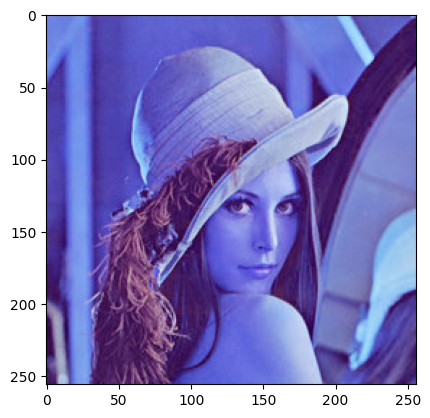

In [16]:
# READ AN IMAGE
# pip install opencv-python
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('img/Lena_RGB.png') # la variable img, comando cv2.imread(la ruta de la imagen/su nombre)
print('Image dimensions: ', np.shape(img))

plt.imshow(img, cmap='gray')
plt.show()

### Extraer por separado la imagen de grises de cada canal BGR

por defecto open CV lee la imagen como BGR y no como RGB

Cuando hacemos img[ :, :, (0-1-2)]: 

- la **primera posición** hace referencia al eje x de la imagen.
- la **segunda posición** hace referencia al eje y de la imagen.
- la **tercera posición** hace referencia al **canal de colores** que se quiere coger en OPEN CV el **0 es blue, el 1 es green, y el 2 es el red**.

Cuando por ejemplo hacemos **R = img[:,:, 2]** le estamos diciendo **"rojo igual a todas las cordenadas de x, todas las de y, y el canal red"**

In [17]:
'''
por defecto opencv no lee la imagen RGB, la lee BGR.
Si queremos obtener los canales debemos darle el siguiente formato:
nombre_de_imagen[cordenadas_en_x,cordenadas_en_y, canal], en el caso practico; img[todox, todoy, 0-1-2]
'''

# Extraer por separado la imagen de grises de cada canal BGR
R = img[:,:,2]
G = img[:,:,1]
B = img[:,:,0]

### Visualizar los canales en un subplot

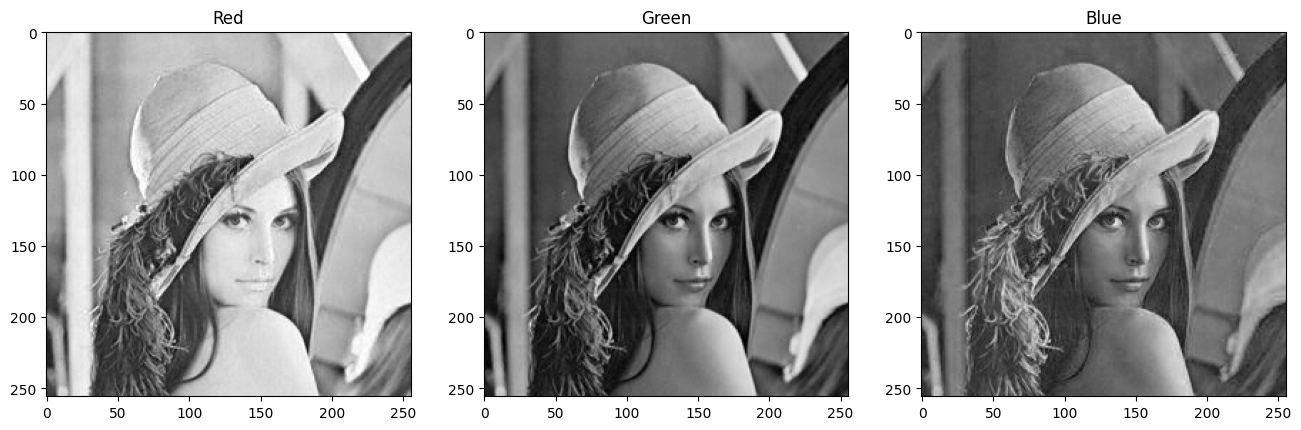

In [21]:


fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,10)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
# plt.figure(figsize= (10,6))
plt.show()

### Convertir BGR en RGB

open cv tiene librerias para convertir las imagenes

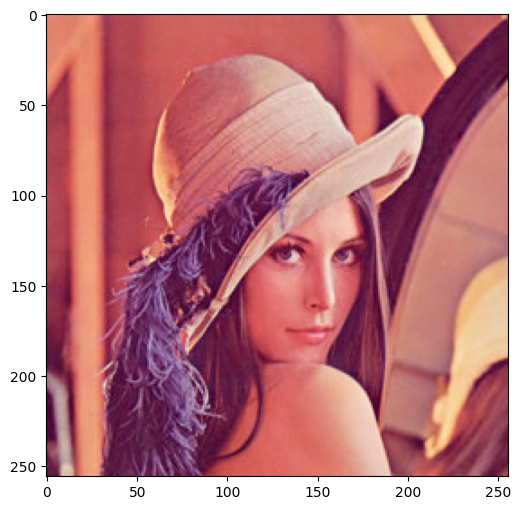

In [22]:
# Convertir BGR en RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize= (8,6))
plt.imshow(RGB_img, cmap='gray')
plt.show()

## TRANSFORMACIONES DE INTENSIDAD

Se puede aplicar a todos los canales o solo ha un canal que nos intereses

### CAMBIO DE BRILLO

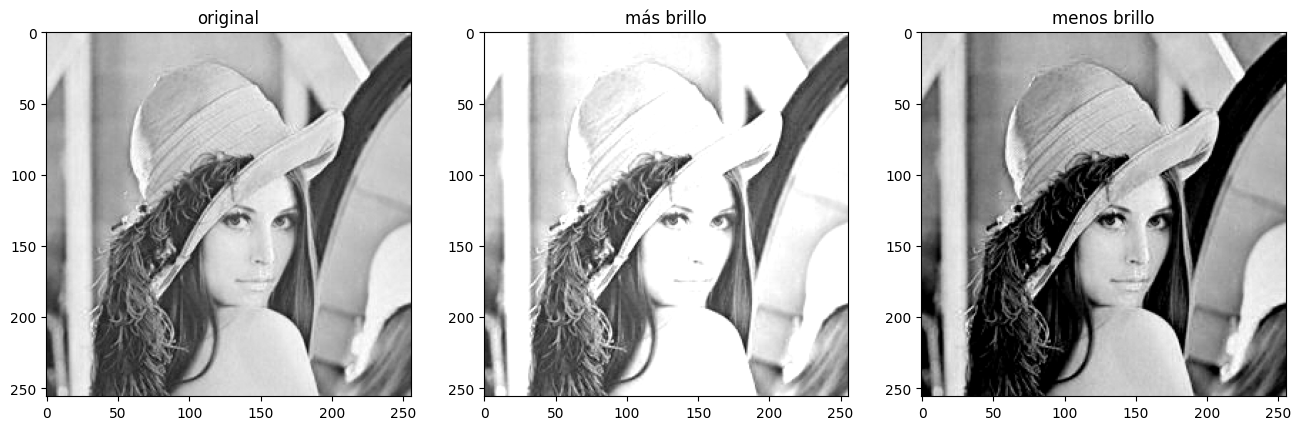

In [24]:
# CAMBIO DE BRILLO


img = cv2.imread('img/Lena_RGB.png') 
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Importante el "cv2.add" en vez de "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
fig.set_size_inches((16,10))
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
fig.subplots_adjust(wspace=0.2) # Si ponemos esta línea se espacian las graficas.

plt.show()

#### CAMBIO DE CONTRASTE

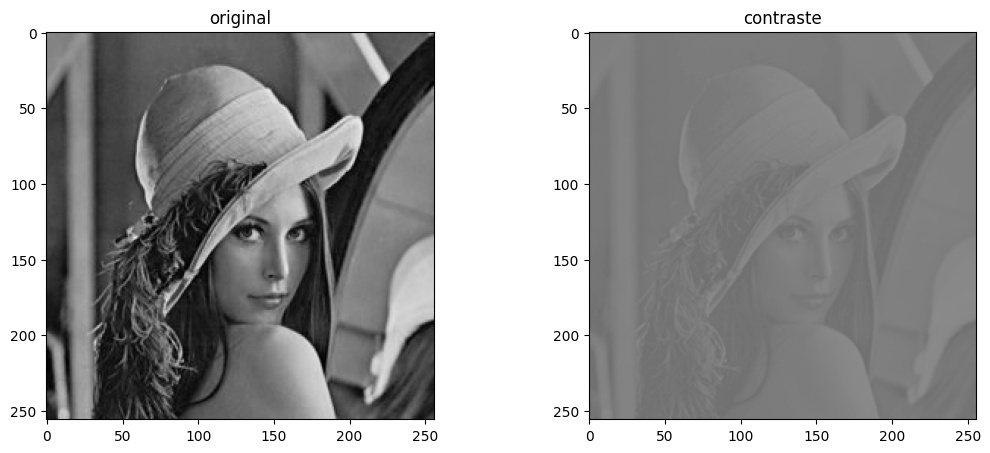

In [7]:
# CAMBIO DE CONTRASTE de acuerdo con el programa GIMP
img = cv2.imread('img/Lena_RGB.png')
img = img[:,:,1] # canal verde

contraste = -100

f = 131*(contraste + 127)/(127*(131-contraste)) # los programas de edicion de imagen utilizan esta formula para manipular el contraste
alpha_c = f
gamma_c = 127*(1-f)

# hace una combinacion entre la imagen original y la transformada
contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
fig.set_size_inches((12,8))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255), ax[0].set_title('original')
ax[1].imshow(contrast_img, cmap='gray', vmin=0, vmax=255), ax[1].set_title('contraste')
fig.subplots_adjust(wspace=0.4) # Si ponemos esta línea se espacian las graficas.

plt.show()

### CONVERSIONES DEL ESPACIO DE COLOR

<img src="formulas_espacios_color.png">

- El canal K es el inverso de la intensidad máxima en cada uno de los canales
- C es cian AZUL
- M es magenta ROSA
- Y es amarillo 

Los útlimos tres son conbinaciones de los canales RGB como indican las fórmulas.

In [8]:
import numpy as np
from skimage import io # la librería skimage si coge los canales en orden RGB

C:\Users\plane\AppData\Local\Temp\ipykernel_9972\2784367644.py:14: RuntimeWarning: invalid value encountered in cast
  CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')


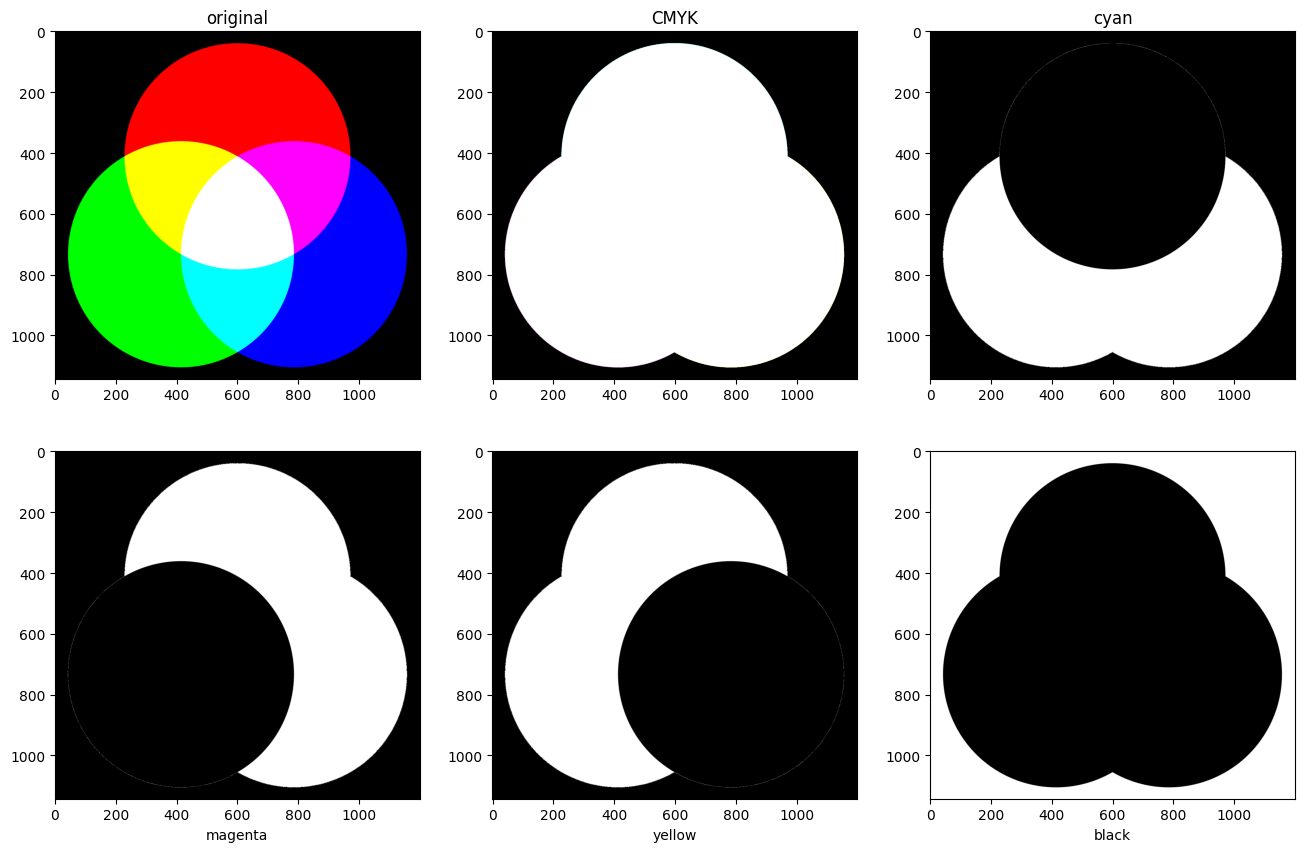

In [9]:
# RGB to CMYK

img = io.imread('img/colores.png')
rgb = img.copy()
rgb_p = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb_p, axis=2)
    # Extrae los canales de acuerdo con la ecuación del power point
    C = (1-rgb_p[:,:,0])/(1-K) # (1-R'-K)/(1-K)
    M = (1-rgb_p[:,:,1])/(1-K) # (1-G'-K)/(1-K)
    Y = (1-rgb_p[:,:,2])/(1-K) # (1-B'-K)/(1-K)

CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
fig.set_size_inches(16,10)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_xlabel('magenta')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_xlabel('yellow')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_xlabel('black')
fig.subplots_adjust(wspace=0.2) # Si ponemos esta línea se espacian las graficas.

plt.show()

### Otras conversiones

In [10]:
# Otras conversiones

img = cv2.imread('img/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul


## TRANSFORMACIONES GEOMÉTRICAS

### TRASLACIÓN

[[1, 0, tx]

  [0, 1, ty]

  [0, 0, 1]]

x' = x + tx

y' = y + ty

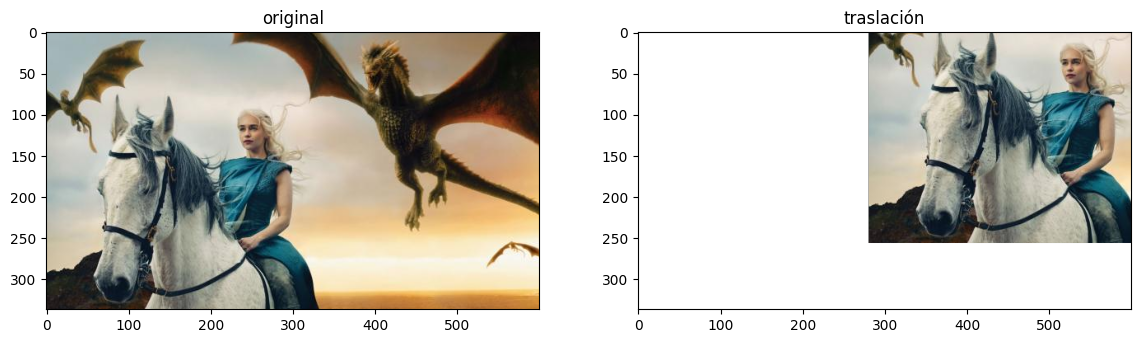

In [11]:
# TRASLACIÓN
img = io.imread('img/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280], [0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img, M, (cols,rows)) # Aplico la transformación

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,8)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

### CROPPING

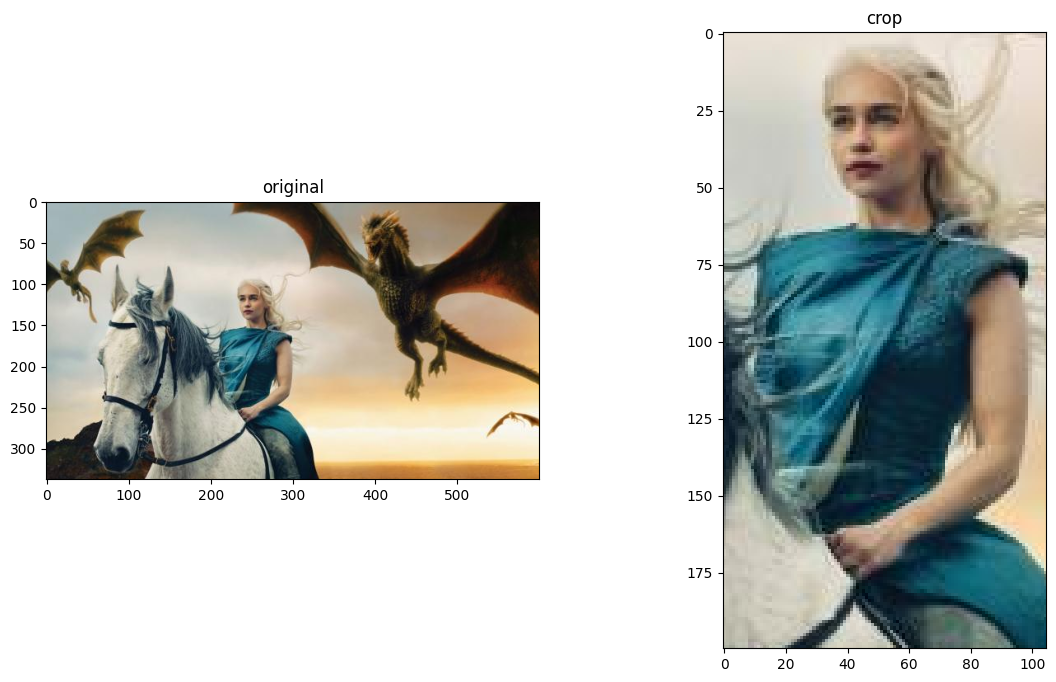

In [12]:
# CROPPING
img = io.imread('img/GOT.png')

new_img = img[90:290, 200:305, :] # si no le especificamos los canales, asume que usaremos todos

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,8)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

### ROTACIÓN

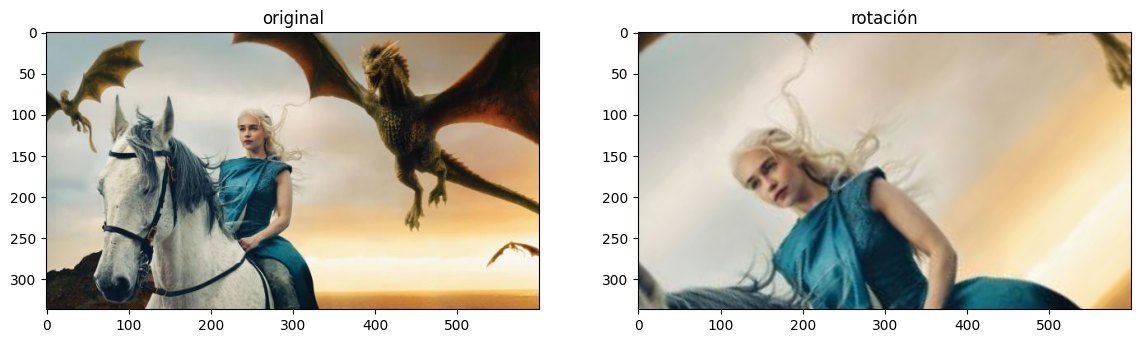

In [13]:
# ROTACIÓN
img = io.imread('img/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,8)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

### PERSPECTIVA

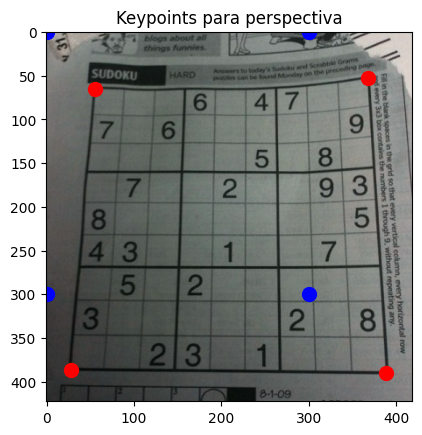

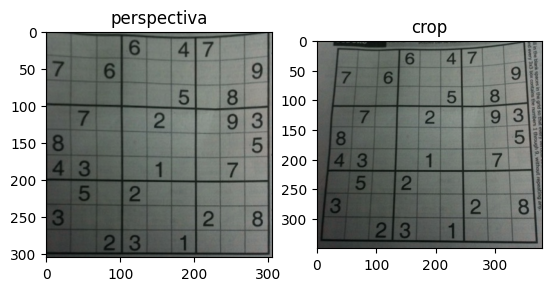

In [14]:
# PERSPECTIVA
img = cv2.imread('img/sudoku.png')
rows, cols, ch = img.shape
 
# estas son las esqeuinas del cuadrado al qeu le quermos aplicar el cambio en la cordenada z
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) # la original
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) # la transformacion

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints para perspectiva')
plt.show()

# se define la matriz de transformación
M = cv2.getPerspectiveTransform(pts1,pts2) # Defino la matriz de transformación
pers = cv2.warpPerspective(img,M,(305,305)) # Aplico la transformación
crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
fig.set_size_inches(14,8)
ax[0].imshow(pers, cmap='gray'), ax[0].set_title('perspectiva')
ax[1].imshow(crop, cmap='gray'), ax[1].set_title('crop')

plt.show()


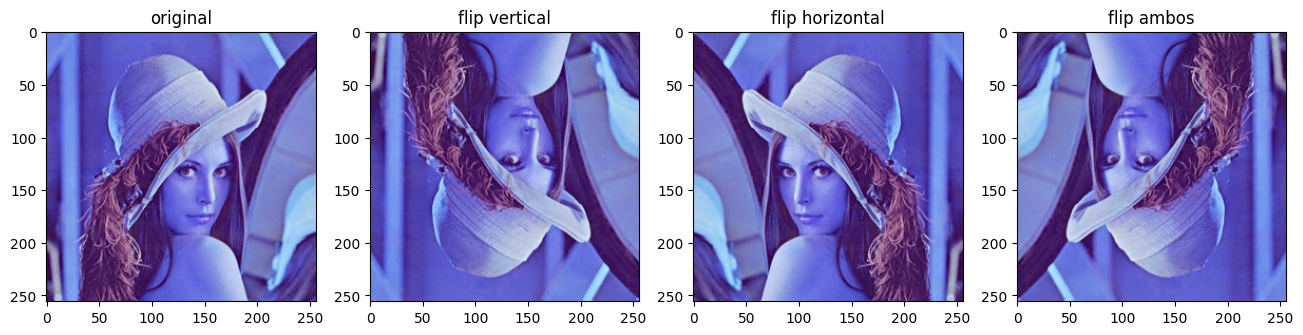

In [15]:
# FLIPPING

# Leer la imagen "Lena_RGB.png" en formato RGB
img = cv2.imread('img/Lena_RGB.png')

# Voltear la imagen para conseguir las siguientes transformaciones. Utiliza el método "cv2.flip()"
  
flipVertical = cv2.flip(img,0)
flipHorizontal = cv2.flip(img,1)
flipBoth = cv2.flip(flipVertical,1)
 
fig, ax = plt.subplots(1,4)
fig.set_size_inches((16,11))
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip ambos')
plt.show()

### Otras libreias

- albumentations.ai/docs/getting_started/transforms_and_targets
- kornia.readthedocs.io/en/latest/geometry.transform.html